In [12]:
import pylab as plt
import pyccl as ccl
import scipy
from scipy.interpolate import interp1d
import numpy as np
import matplotlib

%matplotlib inline

print("CCL version you are using:",ccl.__version__)

CCL version you are using: 2.0.1


In [13]:
#Redshift distribution
zmean1=1.0; zmean2=1.5;
sigz1=0.15; sigz2=0.15;
nzs=512;

#Analytic redshift distributions
z_a_1=np.linspace(zmean1-5*sigz1,zmean1+5*sigz1,nzs);
z_a_2=np.linspace(zmean2-5*sigz2,zmean2+5*sigz2,nzs);
pz_a_1=np.exp(-0.5*((z_a_1-zmean1)/sigz1)**2)
pz_a_2=np.exp(-0.5*((z_a_2-zmean2)/sigz2)**2)
#Bias parameters for these distributions
bz_a_1=np.ones_like(z_a_1); bz_a_2=np.ones_like(z_a_2);

In [14]:
cosmo_ccl1 = ccl.Cosmology(
    Omega_c=0.25, Omega_b=0.05, h=0.7, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)

cosmo_ccl2 = ccl.Cosmology(
    Omega_c=0.25, Omega_b=0.05, h=0.7, A_s=2.1e-9, n_s=0.96, w0=-0.9, Neff=0, Omega_g=0)

cosmo_ccl3 = ccl.Cosmology(
    Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0, Omega_g=0)

cosmo_ccl4 = ccl.Cosmology(
    Omega_c=0.25, Omega_b=0.05, Omega_k=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, 
    w0=-0.9, wa=0.1, Neff=0, Omega_g=0)

cosmo_ccl5 = ccl.Cosmology(
    Omega_c=0.25, Omega_b=0.05, Omega_k=-0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, 
    w0=-0.9, wa=0.1, Neff=0, Omega_g=0)

cosmo_ccl6 = ccl.Cosmology(
    Omega_c=0.3, Omega_b=0.0, h=0.7, sigma8 = 0.8, n_s=0.96, Neff=0,
    transfer_function='bbks', matter_power_spectrum='linear', Omega_g=0)

cosmo_ccl7 = ccl.Cosmology(
    Omega_c=0.3, Omega_b=0.0, h=0.7, sigma8 = 0.8, n_s=0.96, Neff=0,
    transfer_function='bbks', matter_power_spectrum='linear')

cosmo_list = [
    cosmo_ccl1,
    cosmo_ccl2,
    cosmo_ccl3,
    cosmo_ccl4,
    cosmo_ccl5,
    cosmo_ccl6,
    cosmo_ccl7]

In [15]:
ccl_dir = '/global/homes/c/chihway/CCL/'

In [16]:
accuracy = 1e-3

#Redshift distribution
zmean1=1.0; zmean2=1.5;
sigz1=0.15; sigz2=0.15;
nzs=512;

#Analytic redshift distributions
z_a_1=np.linspace(zmean1-5*sigz1,zmean1+5*sigz1,nzs);
z_a_2=np.linspace(zmean2-5*sigz2,zmean2+5*sigz2,nzs);
pz_a_1=np.exp(-0.5*((z_a_1-zmean1)/sigz1)**2)
pz_a_2=np.exp(-0.5*((z_a_2-zmean2)/sigz2)**2)
#Bias parameters for these distributions
bz_a_1=np.ones_like(z_a_1); bz_a_2=np.ones_like(z_a_2);

#Binned redshift distributions and biases
z_h_1,pz_h_1=np.loadtxt(ccl_dir+"benchmarks/data/bin1_histo.txt",unpack=True)[:,1:]
z_h_2,pz_h_2=np.loadtxt(ccl_dir+"benchmarks/data/bin2_histo.txt",unpack=True)[:,1:]
bz_h_1=np.ones_like(z_h_1); bz_h_2=np.ones_like(z_h_2);

#Intrinsic Alignment amplitude arrays
zi_h_1,az_h_1=np.loadtxt(ccl_dir+"benchmarks/data/ia_amp_histo_1.txt",unpack=True)
zi_h_2,az_h_2=np.loadtxt(ccl_dir+"benchmarks/data/ia_amp_histo_2.txt",unpack=True)
zi_a_1,az_a_1=np.loadtxt(ccl_dir+"benchmarks/data/ia_amp_analytic_1.txt",unpack=True)
zi_a_2,az_a_2=np.loadtxt(ccl_dir+"benchmarks/data/ia_amp_analytic_2.txt",unpack=True)

rz_a_1=np.ones_like(z_a_1); rz_a_2=np.ones_like(z_a_2);
rz_h_1=np.ones_like(z_h_1); rz_h_2=np.ones_like(z_h_2);

#Initialize tracers
cosmo_cls=ccl.Cosmology(Omega_c=0.30, Omega_b=0.00, Omega_g=0, Omega_k=0,
                          h=0.7, sigma8=0.8, n_s=0.96, Neff=0, m_nu=0.0,
                          w0=-1, wa=0, T_CMB=2.7, transfer_function='bbks',
                          mass_function='tinker',
                          matter_power_spectrum='linear')
cosmo_cls.cosmo.gsl_params.INTEGRATION_LIMBER_EPSREL = 1E-4
cosmo_cls.cosmo.gsl_params.INTEGRATION_EPSREL = 1E-4
cosmo_cls_cmbl=cosmo_list[-1]


# Renormalize the IA amplitude to be consistent with A_IA
rho_m = ccl.physical_constants.RHO_CRITICAL * cosmo_cls['Omega_m']
D1 = ccl.growth_factor(cosmo_cls, 1./(1+zi_a_1))
D2 = ccl.growth_factor(cosmo_cls, 1./(1+zi_a_2))
az_a_1 = - az_a_1 * D1 / (5e-14 * rho_m)
az_a_2 = - az_a_2 * D2 / (5e-14 * rho_m)
D1 = ccl.growth_factor(cosmo_cls, 1./(1+zi_h_1))
D2 = ccl.growth_factor(cosmo_cls, 1./(1+zi_h_2))
az_h_1 = - az_h_1 * D1 / (5e-14 * rho_m)
az_h_2 = - az_h_2 * D2 / (5e-14 * rho_m)


zarrs={'analytic':{'b1':{'z':z_a_1,'nz':pz_a_1,'bz':bz_a_1,'az':az_a_1,'rz':rz_a_1},'b2':{'z':z_a_2,'nz':pz_a_2,'bz':bz_a_2,'az':az_a_2,'rz':rz_a_2}},
      'histo':{'b1':{'z':z_h_1,'nz':pz_h_1,'bz':bz_h_1,'az':az_h_1,'rz':rz_h_1},'b2':{'z':z_h_2,'nz':pz_h_2,'bz':bz_h_2,'az':az_h_2,'rz':rz_h_2}}}


trcrs={}
for nztyp in ['analytic','histo'] :
    trcrs[nztyp]={}
    za=zarrs[nztyp]
    trcrs[nztyp]['nc_1']=ccl.NumberCountsTracer(cosmo_cls,has_rsd=False,
                                                dndz=(za['b1']['z'],za['b1']['nz']),
                                                bias=(za['b1']['z'],za['b1']['bz']))
    trcrs[nztyp]['nc_2']=ccl.NumberCountsTracer(cosmo_cls,has_rsd=False,
                                                dndz=(za['b2']['z'],za['b2']['nz']),
                                                bias=(za['b2']['z'],za['b2']['bz']))
    trcrs[nztyp]['wl_1']=ccl.WeakLensingTracer(cosmo_cls,
                                               dndz=(za['b1']['z'],za['b1']['nz']))
    trcrs[nztyp]['wl_2']=ccl.WeakLensingTracer(cosmo_cls,
                                               dndz=(za['b2']['z'],za['b2']['nz']))
    trcrs[nztyp]['wli_1']=ccl.WeakLensingTracer(cosmo_cls,
                                               dndz=(za['b1']['z'],za['b1']['nz']),
                                                ia_bias=(za['b1']['z'],za['b1']['az']))
    trcrs[nztyp]['wli_2']=ccl.WeakLensingTracer(cosmo_cls,
                                               dndz=(za['b2']['z'],za['b2']['nz']), 
                                                ia_bias=(za['b2']['z'],za['b2']['az']))
    trcrs[nztyp]['cmbl']=ccl.CMBLensingTracer(cosmo_cls,1100.)
    trcrs[nztyp]['cmblb']=ccl.CMBLensingTracer(cosmo_cls_cmbl,1100.)

In [17]:
#Generate CCL predictions
cl_ccl={}
el_ccl={}
el_bench={}
ells=np.loadtxt(ccl_dir+"examples/larr_cls.txt").astype(int)
ells3k=np.linspace(0,3000,3001).astype(int)
for nztyp in ['analytic','histo'] :
    #Limber prefactors
    lf_dl=(ells+0.5)**2/np.sqrt((ells+2.)*(ells+1.)*ells*(ells-1.))
    lf_dc=(ells+0.5)**2/(ells*(ells+1.))
    lf_ll=ells*(ells+1.)/np.sqrt((ells+2.)*(ells+1.)*ells*(ells-1.))
    
    #CCL Power spectra
    cl_ccl[nztyp]={}
    cl_ccl[nztyp]['nc_1/cmbl']=ccl.angular_cl(cosmo_cls,
                                       trcrs[nztyp]['nc_1'],trcrs[nztyp]['cmbl'],ells)*lf_dc
    cl_ccl[nztyp]['nc_2/cmbl']=ccl.angular_cl(cosmo_cls,
                                       trcrs[nztyp]['nc_2'],trcrs[nztyp]['cmbl'],ells)*lf_dc
    cl_ccl[nztyp]['wl_1/cmbl']=ccl.angular_cl(cosmo_cls,
                                       trcrs[nztyp]['wl_1'],trcrs[nztyp]['cmbl'],ells)*lf_ll
    cl_ccl[nztyp]['wl_2/cmbl']=ccl.angular_cl(cosmo_cls,
                                       trcrs[nztyp]['wl_2'],trcrs[nztyp]['cmbl'],ells)*lf_ll
    cl_ccl[nztyp]['cmbl/cmbl']=ccl.angular_cl(cosmo_cls,
                                       trcrs[nztyp]['cmblb'],trcrs[nztyp]['cmblb'],ells)

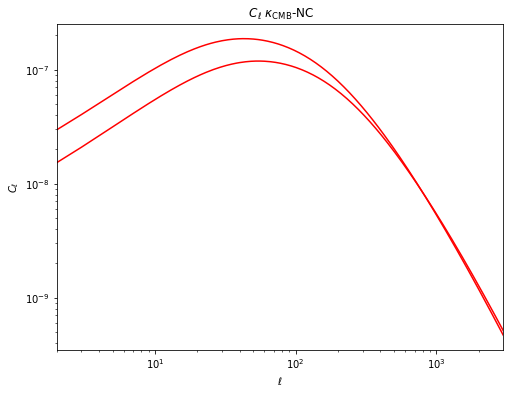

<Figure size 432x288 with 0 Axes>

In [18]:
#galaxy-CMBl
title=r' $C_\ell$ $\kappa_{\rm CMB}$-NC'
plt.figure(figsize=(8,6))
plt.title(title)
# plt.gcf().subplots_adjust(**plot_adjust)
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
for itag,tag in enumerate(['nc_1/cmbl','nc_2/cmbl']) :
    for nztyp in ['histo'] :
        plt.plot(ells,cl_ccl[nztyp][tag],ls='-',c='r')
# for itag,tag in enumerate(['cmbl/cmbl']) :
#     for nztyp in ['analytic'] :
#         plt.plot(ells,np.fabs(cl_bench[nztyp][tag][ells]-cl_ccl[nztyp][tag])/el_ccl[nztyp][tag],
#                  ls=ltypes[nztyp],c=color_map(2))
# plt.plot([-1,-1],[-1,-1],ls='-',c=color_map(0),label='$\\kappa_{\\rm CMB}$-1')
# plt.plot([-1,-1],[-1,-1],ls='-',c=color_map(1),label='$\\kappa_{\\rm CMB}$-2')
# plt.plot([-1,-1],[-1,-1],ls='-',c=color_map(2),label='$\\kappa_{\\rm CMB}$-$\\kappa_{\\rm CMB}$')
# plt.plot([-1,-1],[-1,-1],ls='-',c='k',label='Analytic $N(z)$')
# plt.plot([-1,-1],[-1,-1],ls='--',c='k',label='Binned $N(z)$')
# plt.axhline(0.1, c="k", ls="-.")
plt.xscale('log');
plt.yscale('log');
# plt.ylim([1e-6, 10])
plt.xlim([2,2980])
# plt.legend(loc='upper left',ncol=2, frameon=False, fontsize="x-small");
# plt.savefig('Cl_dc.pdf')
plt.show();
plt.clf();

(2, 2980)

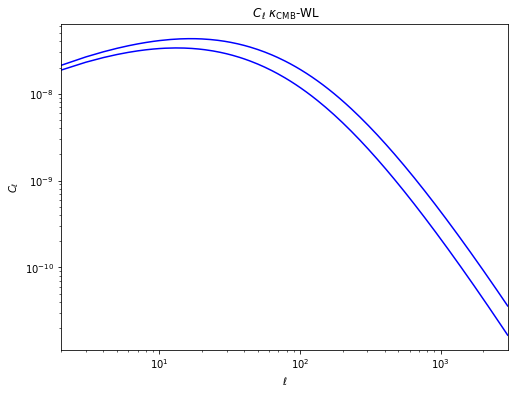

In [19]:
#shear-CMBl
title=r' $C_\ell$ $\kappa_{\rm CMB}$-WL'
plt.figure(figsize=(8,6))
plt.title(title)
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
for itag,tag in enumerate(['wl_1/cmbl','wl_2/cmbl']) :
    for nztyp in ['histo'] :
        plt.plot(ells,cl_ccl[nztyp][tag], ls='-',c='b')
# plt.plot([-1,-1],[-1,-1],ls='-',c=color_map(0),label='$\\kappa_{\\rm CMB}$-1')
# plt.plot([-1,-1],[-1,-1],ls='-',c=color_map(1),label='$\\kappa_{\\rm CMB}$-2')
# plt.plot([-1,-1],[-1,-1],ls='-',c='k',label='Analytic $N(z)$')
# plt.plot([-1,-1],[-1,-1],ls='--',c='k',label='Binned $N(z)$')
# plt.axhline(0.1, c="k", ls="-.")
plt.xscale('log');
plt.yscale('log');
# plt.ylim([1e-6, 10])
plt.xlim([2,2980])
# plt.legend(loc='upper left',ncol=2, frameon=False, fontsize="x-small");
# plt.savefig('Cl_lc.pdf')
# plt.show();
# plt.clf();

In [20]:
theta_deg = np.logspace(-1, 2.5, num=50)/60
print(theta_deg)

[1.66666667e-03 1.96461439e-03 2.31582582e-03 2.72982284e-03
 3.21782955e-03 3.79307654e-03 4.47115966e-03 5.27046277e-03
 6.21265620e-03 7.32328427e-03 8.63245780e-03 1.01756705e-02
 1.19947612e-02 1.41390483e-02 1.66666667e-02 1.96461439e-02
 2.31582582e-02 2.72982284e-02 3.21782955e-02 3.79307654e-02
 4.47115966e-02 5.27046277e-02 6.21265620e-02 7.32328427e-02
 8.63245780e-02 1.01756705e-01 1.19947612e-01 1.41390483e-01
 1.66666667e-01 1.96461439e-01 2.31582582e-01 2.72982284e-01
 3.21782955e-01 3.79307654e-01 4.47115966e-01 5.27046277e-01
 6.21265620e-01 7.32328427e-01 8.63245780e-01 1.01756705e+00
 1.19947612e+00 1.41390483e+00 1.66666667e+00 1.96461439e+00
 2.31582582e+00 2.72982284e+00 3.21782955e+00 3.79307654e+00
 4.47115966e+00 5.27046277e+00]


Text(0, 0.5, 'NK')

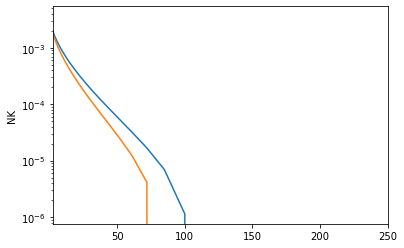

In [21]:
#Assume that c_ell are computed above in the Angular_cl benchmark
#If you haven't run that cell, please scroll up to run it.
#Then proceed to compute the relavent correlation functions: clustering and lensing auto-correlations.
corr={}

for nztyp in ['histo'] :
    corr[nztyp]={}
    za=zarrs[nztyp]
    for tag in ['nc_1/cmbl','nc_2/cmbl'] :
        corr[nztyp][tag]={}
        ell=ells
        cell=cl_ccl[nztyp][tag]
        corr[nztyp][tag]=ccl.correlation(cosmo_cls, ell, cell, theta_deg,
                                                       corr_type='GG', method='Bessel')
        plt.semilogy(theta_deg*60,corr[nztyp][tag],ls='-')

plt.xlim(2.5,250)
plt.ylabel('NK')

(2.5, 250.0)

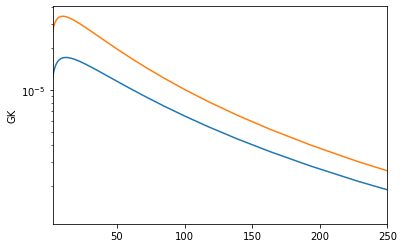

In [22]:
#Assume that c_ell are computed above in the Angular_cl benchmark
#If you haven't run that cell, please scroll up to run it.
#Then proceed to compute the relavent correlation functions: clustering and lensing auto-correlations.

for nztyp in ['histo'] :
    corr[nztyp]={}
    za=zarrs[nztyp]
    for tag in ['wl_1/cmbl','wl_2/cmbl'] :
        corr[nztyp][tag]={}
        ell=ells
        cell=cl_ccl[nztyp][tag]
        corr[nztyp][tag]=ccl.correlation(cosmo_cls, ell, cell, theta_deg,
                                                       corr_type='GL', method='Bessel')
        plt.semilogy(theta_deg*60,corr[nztyp][tag],ls='-')

plt.ylabel('GK')
plt.xlim(2.5,250)